In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#import dataframe to be analysed
df = pd.read_csv('inflation_domestic.csv', index_col = 0)

In [3]:
#remove decimal points
pd.set_option('display.float_format', '{:.0f}'.format)

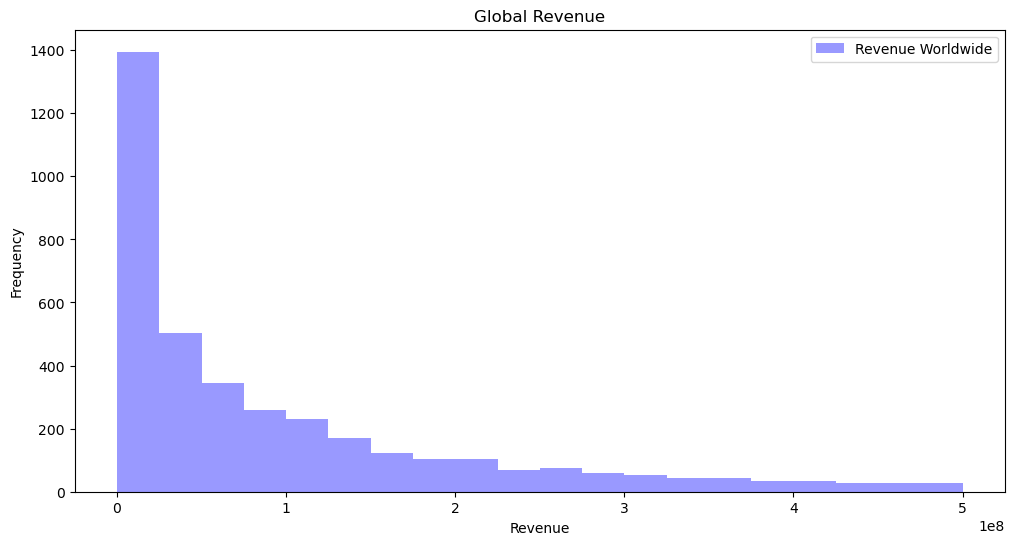

In [4]:
#remove all 0 value rows
df = df[(df != 0).all(axis=1)]

plt.figure(figsize=(12, 6))

#define a bin range for plotting
bin_range = (0, 500000000)  
num_bins = 20

# Generate evenly spaced bin edges
bin_edges = np.linspace(bin_range[0], bin_range[1], num_bins + 1)

# Plot Gross Revenue
plt.hist(df['Gross Revenue Worldwide USD'], bins=bin_edges, alpha=0.4, label='Revenue Worldwide', color='blue')

# Plot Estimated Budget
#plt.hist(df['Gross Revenue US&Canada USD'], bins=bin_edges, alpha=0.4, label='Revenue Domestic', color='green')


# Plot
plt.title('Global Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [5]:
#create a graph to show the ratio of what movies have revenue in what countries

#import boxofficemojo and use the current sample size to represent the population
df_all = pd.read_csv('boxofficemojo (2).csv', index_col = 0)

#drop unnecessary columns
df_all = df_all.drop(columns=['ID','Distributor'])

#replace all unknown values with 0
df_all = df_all.applymap(lambda x: str(x).replace('unknown', '0'))
# df_all = df_all.astype['Int64']

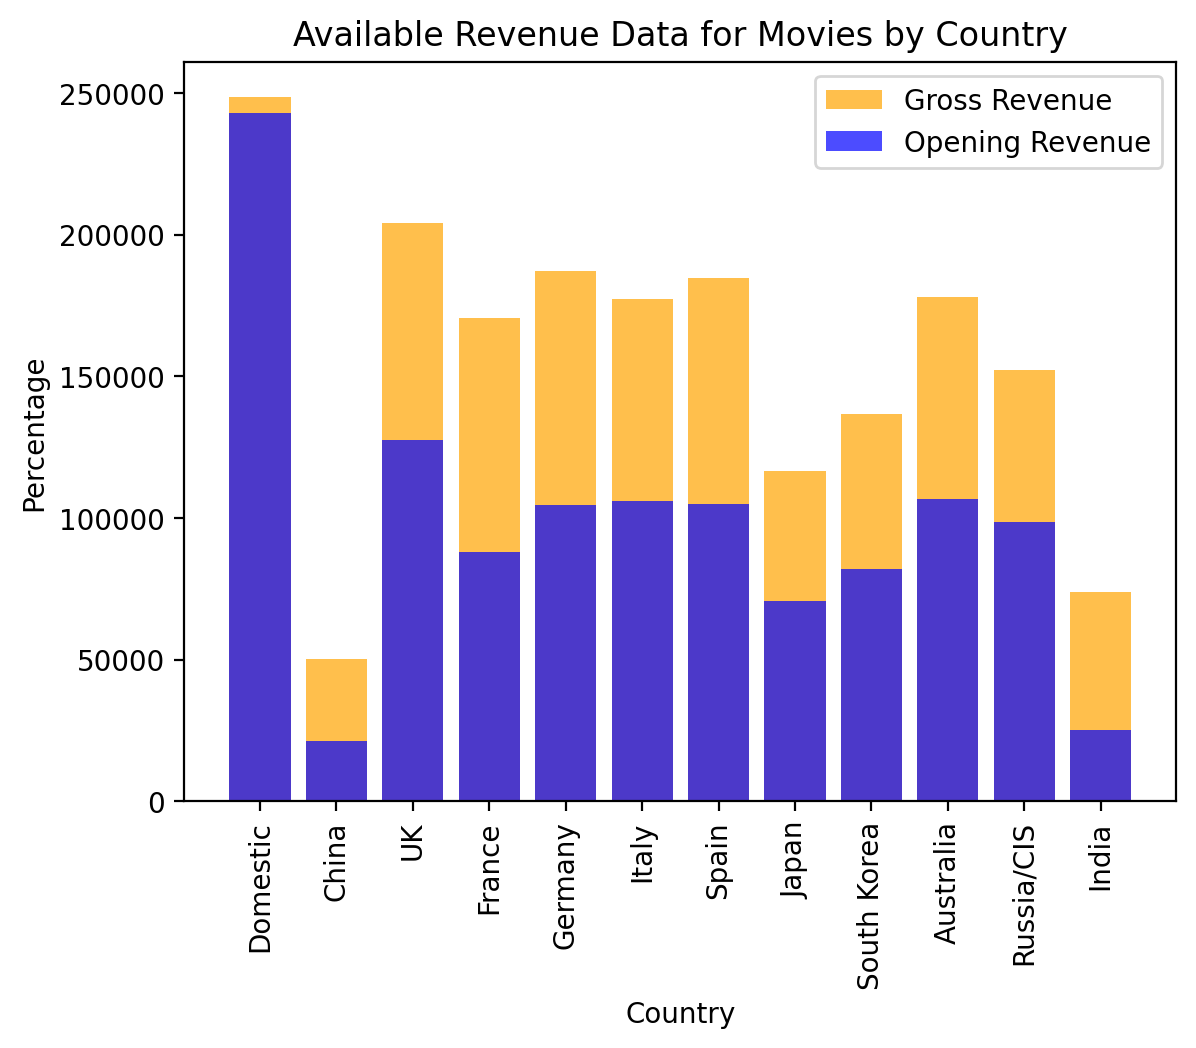

In [6]:
#define counter variables
wgr = 0
do = 0
dg = 0
co = 0
cg = 0
uo = 0
ug = 0
fo = 0
fg = 0
go = 0
gg = 0
ito = 0
itg = 0
so = 0
sg = 0
jo = 0
jg = 0
sko = 0
skg = 0
ao = 0
ag = 0
ro = 0
rg = 0
io = 0
ig = 0

# Iterate through rows
for index, row in df_all.iterrows():
    # Iterate through columns
    for col in df_all.columns:
        # Check condition based on column name
        if col == 'Worldwide Gross Revenue (sus)':
            if row[col] != '0':
                wgr += 1
            else:
                wgr += 0
        elif col == 'Domestic Opening':
            if row[col] != '0':
                do += 1
            else:
                do += 0
        elif col == 'Domestic Gross':
            if row[col] != '0':
                dg += 1
            else:
                dg += 0
        elif col == 'China Opening':
            if row[col] != '0':
                co += 1
            else:
                co += 0
        elif col == 'China Gross':
            if row[col] != '0':
                cg += 1
            else:
                cg += 0
        elif col == 'UK Opening':
            if row[col] != '0':
                uo += 1
            else:
                uo += 0
        elif col == 'UK Gross':
            if row[col] != '0':
                ug += 1
            else:
                ug += 0
        elif col == 'France Opening':
            if row[col] != '0':
                fo += 1
            else:
                fo += 0
        elif col == 'France Gross':
            if row[col] != '0':
                fg += 1
            else:
                fg += 0
        elif col == 'Germany Opening':
            if row[col] != '0':
                go += 1
            else:
                go += 0
        elif col == 'Germany Gross':
            if row[col] != '0':
                gg += 1
            else:
                gg += 0
        elif col == 'Italy Opening':
            if row[col] != '0':
                ito += 1
            else:
                ito += 0
        elif col == 'Italy Gross':
            if row[col] != '0':
                itg += 1
            else:
                itg += 0
        elif col == 'Spain Opening':
            if row[col] != '0':
                so += 1
            else:
                so += 0
        elif col == 'Spain Gross':
            if row[col] != '0':
                sg += 1
            else:
                sg += 0
        elif col == 'Japan Opening':
            if row[col] != '0':
                jo += 1
            else:
                jo += 0
        elif col == 'Japan Gross':
            if row[col] != '0':
                jg += 1
            else:
                jg += 0
        elif col == 'South Korea Opening':
            if row[col] != '0':
                sko += 1
            else:
                sko += 0
        elif col == 'South Korea Gross':
            if row[col] != '0':
                skg += 1
            else:
                skg += 0
        elif col == 'Australia Opening':
            if row[col] != '0':
                ao += 1
            else:
                ao += 0
        elif col == 'Australia Gross':
            if row[col] != '0':
                ag += 1
            else:
                ag += 0
        elif col == 'Russia/CIS Opening':
            if row[col] != '0':
                ro += 1
            else:
                ro += 0
        elif col == 'Russia/CIS Gross':
            if row[col] != '0':
                rg += 1
            else:
                rg += 0
        elif col == 'India Opening':
            if row[col] != '0':
                io += 1
            else:
                io += 0
        elif col == 'India Gross':
            if row[col] != '0':
                ig += 1
            else:
                ig += 0
        else:
            continue

#create dataframe with counter variables
            
df_opening = pd.DataFrame({'Domestic': [do], 
                           'China':[co],
                           'UK': [uo], 
                           'France': [fo],
                           'Germany': [go],
                           'Italy': [ito],
                           'Spain': [so],
                           'Japan': [jo],
                           'South Korea': [sko],
                           'Australia': [ao],
                           'Russia/CIS': [ro],
                           'India': [io],})

df_gross = pd.DataFrame({  'Domestic': [dg], 
                             'China':[cg],
                           'UK': [ug], 
                           'France': [fg],
                           'Germany': [gg],
                           'Italy': [itg],
                           'Spain': [sg],
                           'Japan': [jg],
                           'South Korea': [skg],
                           'Australia': [ag],
                           'Russia/CIS': [rg],
                           'India': [ig],})


#convert to percentage of total dataframe size
df_opening = df_opening / len(df_opening) * 100
df_gross = df_gross / len(df_gross) * 100

#flatten
columns = df_opening.columns
o_values = df_opening.values.flatten()
g_values = df_gross.values.flatten()

#make a higher quality plot
plt.figure(dpi=200)
# Plot the bar chart for the first DataFrame
plt.bar(columns, g_values, label='Gross Revenue', color='orange', alpha=0.7)

# Plot the bar chart for the second DataFrame
plt.bar(columns, o_values, label='Opening Revenue', color='blue', alpha=0.7)



# Add labels and title
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Available Revenue Data for Movies by Country')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.show()

In [7]:
df_opening


,Domestic,China,UK,France,Germany,Italy,Spain,Japan,South Korea,Australia,Russia/CIS,India
0,242800,21200,127400,88000,104400,105800,105000,70500,82000,106600,98400,25300


In [8]:
df_gross


,Domestic,China,UK,France,Germany,Italy,Spain,Japan,South Korea,Australia,Russia/CIS,India
0,248500,50300,204200,170600,187100,177100,184800,116600,136600,178100,152300,74000
